In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#!pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [2]:
def som_pie_grid(som, data, labels):
  """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
  labels_map = som.labels_map(data, labels)
  label_names = np.unique(labels)

  plt.figure(figsize=(70, 70))
  the_grid = GridSpec(70, 70)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][lab] for lab in label_names]
      plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.show()

  # Cheating way to align legend, create a separate figure just 
  # for legend.  Will have superfluous whitespace below
  plt.legend(patches, label_names, loc='upper left', ncol=5)
  plt.axis('off')
  plt.show()

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [3]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

In [4]:
iris_df = pd.read_csv(data_url)

In [5]:
iris_df.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seas    2141 non-null   int64  
 1   Player  2141 non-null   object 
 2   Pos     2141 non-null   object 
 3   Age     2141 non-null   int64  
 4   Tm      2141 non-null   object 
 5   G       2141 non-null   int64  
 6   GS      2141 non-null   int64  
 7   MP      2141 non-null   float64
 8   FG      2141 non-null   float64
 9   FGA     2141 non-null   float64
 10  FG%     2131 non-null   float64
 11  3P      2141 non-null   float64
 12  3PA     2141 non-null   float64
 13  3P%     1967 non-null   float64
 14  2P      2141 non-null   float64
 15  2PA     2141 non-null   float64
 16  2P%     2110 non-null   float64
 17  eFG%    2131 non-null   float64
 18  FT      2141 non-null   float64
 19  FTA     2141 non-null   float64
 20  FT%     2037 non-null   float64
 21  ORB     2141 non-null   float64
 22  

In [7]:
iris_df = iris_df.dropna()

In [8]:
iris_df.isna().mean()

Seas      0.0
Player    0.0
Pos       0.0
Age       0.0
Tm        0.0
G         0.0
GS        0.0
MP        0.0
FG        0.0
FGA       0.0
FG%       0.0
3P        0.0
3PA       0.0
3P%       0.0
2P        0.0
2PA       0.0
2P%       0.0
eFG%      0.0
FT        0.0
FTA       0.0
FT%       0.0
ORB       0.0
DRB       0.0
TRB       0.0
AST       0.0
STL       0.0
BLK       0.0
TOV       0.0
PF        0.0
PTS       0.0
dtype: float64

In [9]:
iris_df = iris_df[iris_df['Pos'].isin(['C', 'PG', 'SG'])]

In [10]:
iris_df = iris_df.drop(columns=['Player', 'Tm'])

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [11]:
X = iris_df.drop(columns='Pos')
y = iris_df['Pos']

In [12]:
som_df = pd.DataFrame(X)

In [13]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [14]:
som = MiniSom(x = 4, y = 4, input_len = som_df.shape[1], random_seed=66)

In [15]:
X.isna().mean()

Seas    0.0
Age     0.0
G       0.0
GS      0.0
MP      0.0
FG      0.0
FGA     0.0
FG%     0.0
3P      0.0
3PA     0.0
3P%     0.0
2P      0.0
2PA     0.0
2P%     0.0
eFG%    0.0
FT      0.0
FTA     0.0
FT%     0.0
ORB     0.0
DRB     0.0
TRB     0.0
AST     0.0
STL     0.0
BLK     0.0
TOV     0.0
PF      0.0
PTS     0.0
dtype: float64

In [16]:
som.pca_weights_init(scaled)
som.train_random(scaled, num_iteration=100)
som.get_weights()

array([[[ 1.32562726, -0.48274668,  0.54407079, -0.15102189,
         -0.16729466, -0.32620073, -0.39531221,  0.36141366,
          0.02627385, -0.03797043,  0.19761637, -0.39472379,
         -0.49600473,  0.54989079,  0.61801093, -0.46934925,
         -0.47477602, -0.01474203, -0.142507  , -0.14287911,
         -0.14982908, -0.33059154, -0.51758811, -0.27386594,
         -0.54224014,  0.10104542, -0.34054193],
        [ 1.32684538, -0.40891961,  0.51090509, -0.15320574,
         -0.20460307, -0.22252794, -0.39806595,  0.8162252 ,
         -0.44880478, -0.47546435, -0.31415339, -0.06980299,
         -0.23692131,  0.79856053,  0.67848972, -0.27975817,
         -0.21003377, -0.38344451,  0.74178473,  0.48067853,
          0.59154307, -0.51873721, -0.47525091,  0.6886809 ,
         -0.43256704,  0.50165548, -0.28814654],
        [ 1.32674888, -0.31632514,  0.55633766,  0.83850245,
          0.45150205,  0.62407729,  0.30295102,  1.11054443,
         -0.60136376, -0.5774454 , -0.349933  , 

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

In [17]:
len(iris_df)

1154

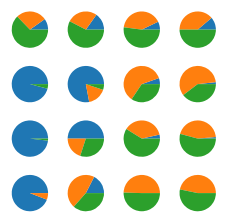

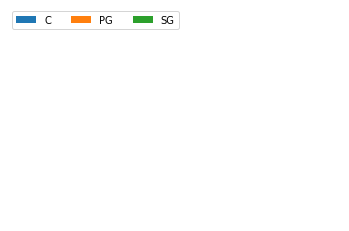

In [18]:
som_pie_grid(som, scaled, iris_df['Pos'])

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

In [28]:
pca = PCA(2)
two_d = pd.DataFrame(pca.fit_transform(scaled))

In [29]:
two_d.columns = ['1', '2']
two_d

,1,2
0,-2.781979,-1.246254
1,-3.709781,-0.969946
2,5.195114,5.726987
3,1.961253,3.681634
4,-5.837433,0.327246
...,...,...
1149,-0.592360,-1.015144
1150,-5.620128,0.632717
1151,-3.816951,-0.639291
1152,-2.333072,-2.028981


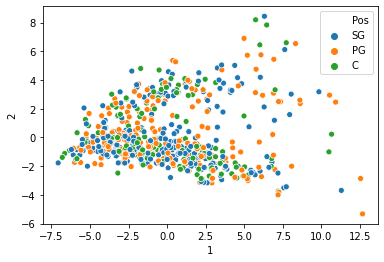

In [30]:
sns.scatterplot("1", "2", hue=iris_df['Pos'], data=two_d)
plt.show()

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.